In [3]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

array([[    0.      ,    35.134141,   139.132082,     0.      ,
            0.      ],
       [    1.      ,    35.135826,   139.129202,     0.      ,
          322.      ],
       [    2.      ,    35.13751 ,   139.126322,     0.      ,
          644.      ],
       ...,
       [  297.      ,    35.631284,   138.271368,  1973.99    ,
        95698.      ],
       [  298.      ,    35.632947,   138.268452,  1841.36    ,
        96020.      ],
       [  299.      ,    35.63461 ,   138.265536,  1725.8     ,
        96343.      ]])

**[Problem 1] Data visualization**

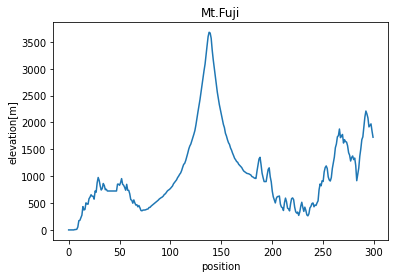

In [6]:
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt.Fuji')
plt.plot(fuji[:, 0], fuji[:, 3]);

**[Problem 2] Create a function to calculate the gradient at a certain point**

In [8]:
def calculate_gradient():
  amount_change = fuji[1:, (0, 3)] - fuji[:-1, (0, 3)]
  return amount_change[:, 1] / amount_change[:, 0]


In [10]:
gradient = calculate_gradient()

**[Problem 3] Create a function to calculate the destination point**

In [13]:
gradient_p = np.concatenate([np.array([0]), gradient])

def destination_point(current_point, alpha=0.2):
    return np.round(current_point - alpha*gradient_p[current_point])

**[Problem 4] Create a function that goes down the mountain**

In [14]:
def go_down(current_point, alpha=0.2):
    
    trace = [current_point]
    
    for _  in range(1000):
        destination = destination_point(trace[-1], alpha)
        trace.append(int(destination))
        
        if trace[-1] in trace[:-1]:
            return trace
        
    return trace

In [15]:
trace = go_down(136)
trace

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]

**[Problem 5] Visualization of the descent process**

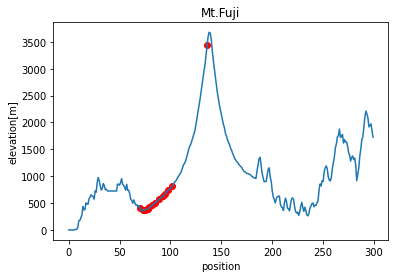

In [16]:
plt.scatter(trace, fuji[trace, 3], c='r')

plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt.Fuji')
plt.plot(fuji[:, 0], fuji[:, 3]);

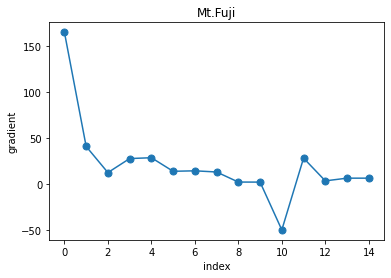

In [17]:
plt.xlabel('index')
plt.ylabel('gradient')
plt.title('Mt.Fuji')
plt.plot(gradient[trace], marker="o", markersize=7);


**[Problem 6] Change of initial value**

In [23]:
trace2 = go_down(150)
trace2

[150, 169, 173, 176, 177, 178, 180, 186, 164, 169]

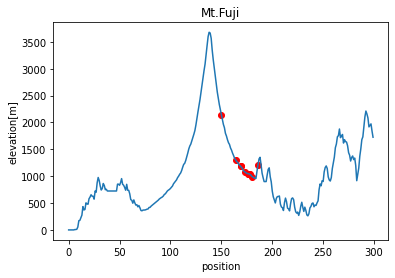

In [24]:
plt.scatter(trace2, fuji[trace2, 3], c='r')

plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt.Fuji')
plt.plot(fuji[:, 0], fuji[:, 3]);

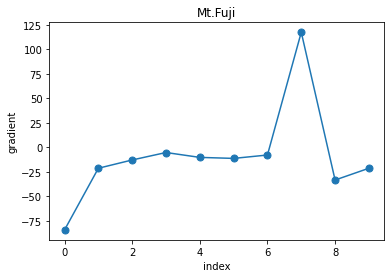

In [25]:
plt.xlabel('index')
plt.ylabel('gradient')
plt.title('Mt.Fuji')
plt.plot(gradient[trace2], marker="o", markersize=7);

**[Problem 7] (Advance problem) Hyperparameter change**

In [26]:
advance_trace = go_down(136, 0.01)
advance_trace

[136,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 120]

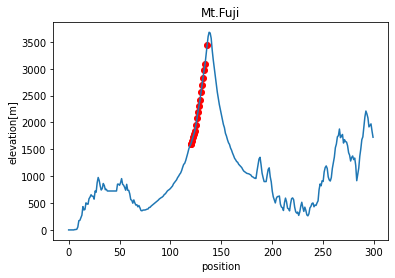

In [28]:
plt.scatter(advance_trace, fuji[advance_trace, 3], c='r')

plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt.Fuji')
plt.plot(fuji[:, 0], fuji[:, 3]);

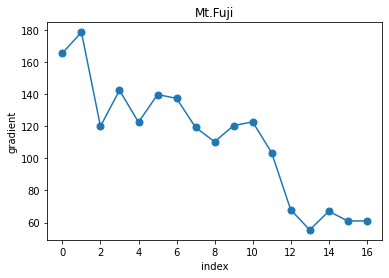

In [29]:
plt.xlabel('index')
plt.ylabel('gradient')
plt.title('Mt.Fuji')
plt.plot(gradient[advance_trace], marker="o", markersize=7);